In [1]:
%matplotlib inline

import gc
import fpfs
import pltutil
import numpy as np
import matplotlib.pylab as plt
from mpl_toolkits.axes_grid1 import ImageGrid

import matplotlib as mpl
mpl.rcParams['axes.linewidth'] = 2.0 #set the value globally
mpl.rcParams['text.latex.preamble']=[r"\usepackage{amsmath}"]

/var/tmp/pbs.103819.idark/ipykernel_265030/99519768.py:12: MatplotlibDeprecationWarning: Support for setting an rcParam that expects a str value to a non-str value is deprecated since 3.5 and support will be removed two minor releases later.
  mpl.rcParams['text.latex.preamble']=[r"\usepackage{amsmath}"]


In [2]:
wrkDir=os.environ['homeWrk']
simDir=os.path.join(wrkDir,'FPFS2/sim')
assert os.path.isdir(simDir)
galDir=os.path.join(simDir,'galaxy_basic2Shift_psf60')
assert os.path.isdir(galDir)

In [3]:
ngrid       =   64
pixScale    =   0.168
psfFWHM     =   60 # arcsec

# FPFS Basic
beta        =   0.50 # try2
rcut        =   16   #max(min(int(psfFWHMF/pixScale*4+0.5),15),12)
beg         =   ngrid//2-rcut
end         =   beg+2*rcut
# PSF
psfFname    =   os.path.join(galDir,'psf-%s.fits' %psfFWHM)
psfData     =   pyfits.open(psfFname)[0].data
npad        =   (ngrid-psfData.shape[0])//2
psfData2    =   np.pad(psfData,(npad+1,npad),mode='constant')
psfData2    =   psfData2[beg:end,beg:end]
measTask    =   fpfs.image.measure_source(psfData2,beta=beta)

In [4]:
psfData2.shape

(32, 32)

/var/tmp/pbs.103819.idark/ipykernel_265030/4063460662.py:35: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


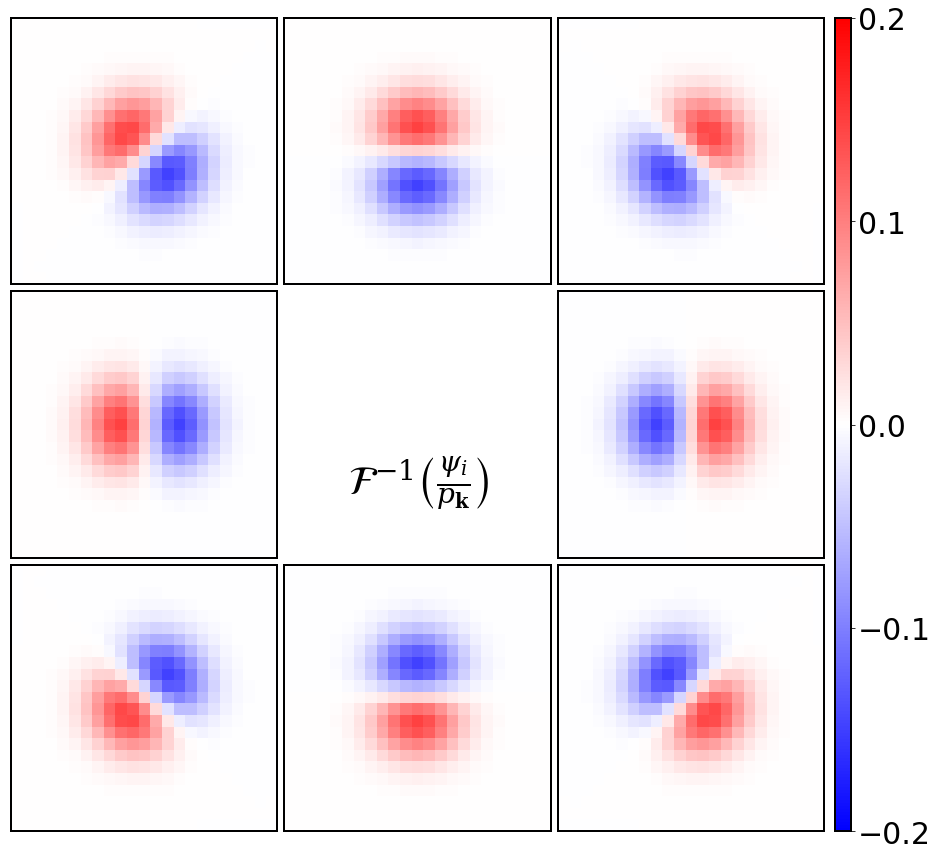

In [7]:
inds=[5,2,1,0,3,6,7,8]
plt.close()
fig=plt.figure(figsize=(13,12))
grid = ImageGrid(fig, 111,          # as in plt.subplot(111)
                 nrows_ncols=(3,3),
                 axes_pad=0.1,
                 share_all=True,
                 cbar_location="right",
                 cbar_mode="single",
                 cbar_size="2%",
                 cbar_pad=0.15,
                 )

for i in range(8):
    ax=grid[inds[i]]
    fun=measTask.Psi[::3][i]
    fun2=np.fft.fftshift(np.fft.ifft2(np.fft.ifftshift(fun)).real)*32**2./(0.168)**2.
    im=ax.imshow(fun2,aspect='equal',origin='lower',cmap='bwr',vmin=-0.2,vmax=0.2)
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.set_xticks([])
    ax.set_yticks([])
    #ax.grid(color='black', linestyle='-', linewidth=2)
    #ax.set_title(tlist[i])
    for x in ax.spines.values():
        x.set_linewidth(2.)

grid[4].axis('off')
grid[4].text(5,5,r'$\mathcal{F}^{-1}\left(\frac{\psi_{i}}{p_\mathbf{k}}\right)$',fontsize=40)

cbar=ax.cax.colorbar(im)
cbar.ax.tick_params(labelsize=30)
cbar.ax.set_yticks([-0.2,-0.1,0.,0.1,0.2])
gc.collect()
fig.tight_layout()
fig.savefig('psi_demo.pdf')

In [6]:
fun=measTask.Chi[0]

In [23]:
0.168**3./np.sqrt(np.sum(fun**2.))

1.9044567850251706

In [22]:
1./measTask.sigmaF*0.168*2.35

1.3978659041621715

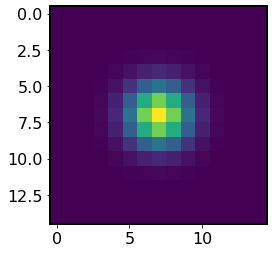

In [9]:
plt.imshow(fun)

/var/tmp/pbs.103819.idark/ipykernel_265030/3784411168.py:34: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


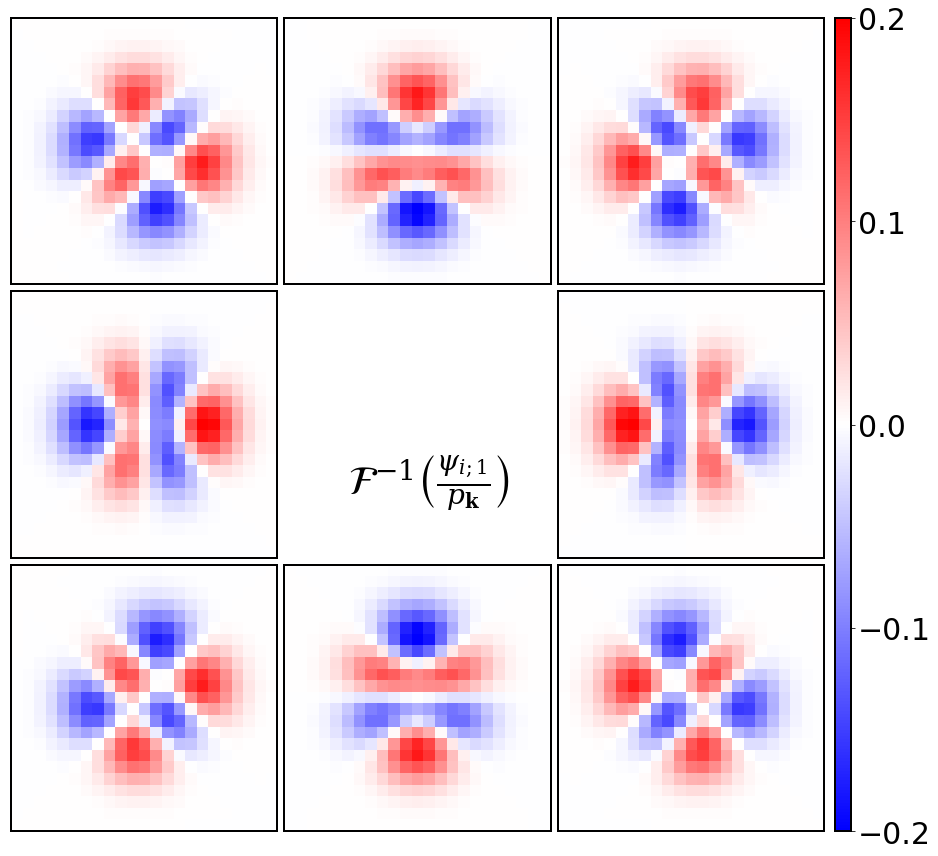

In [8]:
inds=[5,2,1,0,3,6,7,8]
plt.close()
fig=plt.figure(figsize=(13,12))
grid = ImageGrid(fig, 111,          # as in plt.subplot(111)
                 nrows_ncols=(3,3),
                 axes_pad=0.1,
                 share_all=True,
                 cbar_location="right",
                 cbar_mode="single",
                 cbar_size="2%",
                 cbar_pad=0.15,
                 )

for i in range(8):
    ax=grid[inds[i]]
    fun=measTask.Psi[1::3][i]
    fun2=np.fft.fftshift(np.fft.ifft2(np.fft.ifftshift(fun)).real)*32**2./(0.168)**2.
    im=ax.imshow(fun2,aspect='equal',origin='lower',cmap='bwr',vmin=-0.2,vmax=0.2)
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.set_xticks([])
    ax.set_yticks([])
    #ax.grid(color='black', linestyle='-', linewidth=2)
    #ax.set_title(tlist[i])
    for x in ax.spines.values():
        x.set_linewidth(2.)
grid[4].axis('off')
grid[4].text(5.,5,r'$\mathcal{F}^{-1}\left(\frac{\psi_{i;1}}{p_{\mathbf{k}}}\right)$',fontsize=40)

cbar=ax.cax.colorbar(im)
cbar.ax.tick_params(labelsize=30)
cbar.ax.set_yticks([-0.2,-0.1,0.,0.1,0.2])
gc.collect()
fig.tight_layout()
fig.savefig('psidg1_demo.pdf')